# 📘 M1 - Data Preparation and Preprocessing

**Curso:** Practical English / Machine Learning M1  
**Ano letivo:** 2025/2026  
**Autor:** Francisco Nunes/Daniel Rodrigues 2022147843/2022103368  
**Data:** 11/11/2025

---

## 🎯 Objective

This notebook presents the **data understanding, cleaning, and preprocessing** stages required for the M1 assignment.  
The goal is to prepare a **binary classification dataset** with:
- 8–30 features (numeric, categorical, and ordinal);
- at least 1,000 rows;
- clear and reproducible preprocessing pipelines.

---

## 🗂 Notebook Outline
1. Data Import and Overview  
2. Exploratory Data Analysis (EDA)  
3. Data Cleaning and Handling Missing Values  
4. Feature Encoding (categorical & ordinal)  
5. Feature Scaling and Outlier Treatment  
6. Pipeline Construction with `scikit-learn`  
7. Train/Test Split and Data Export  
8. Conclusions and Next Steps


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, OrdinalEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import os
import warnings
warnings.filterwarnings("ignore")

RAW_PATH = "../data/raw/"
PROC_PATH = "../data/processed/"

print("✅ Libraries loaded successfully.")


✅ Libraries loaded successfully.


In [2]:
from dotenv import load_dotenv, find_dotenv
import os

# Carregar variáveis do ficheiro .env
load_dotenv(find_dotenv())

print("KAGGLE_USERNAME:", os.getenv("KAGGLE_USERNAME"))
print("KAGGLE_KEY:", os.getenv("KAGGLE_KEY")[:5] + "********")


KAGGLE_USERNAME: francisconunes10
KAGGLE_KEY: 55a53********


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from dotenv import load_dotenv
import pandas as pd
import os

load_dotenv()

# Faz login automático (lê do .env ou pede credenciais)
kagglehub.login()

# Carregar dataset "Stroke Prediction" diretamente
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fedesoriano/stroke-prediction-dataset",
    "healthcare-dataset-stroke-data.csv"
)

print("✅ Dataset carregado com sucesso!")
print("Shape:", df.shape)
df.head()


✅ Dataset carregado com sucesso!
Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:

print("\n" + "="*60)
print("VALIDAÇÃO DOS REQUISITOS DO M1")
print("="*60)

print("\n✅ 1. Dados Reais: Healthcare Stroke Dataset (Kaggle)")
print(f"✅ 2. Classificação Binária: stroke (0/1)")
print(f"   Distribuição: {df['stroke'].value_counts().to_dict()}")

n_features = len(df.columns) - 1
print(f"✅ 3. Features: {n_features} (requisito: 8-30)")

print(f"✅ 4. Instâncias: {len(df)} (requisito: ≥1000)")

print(f"\n✅ 5. Tipos de Atributos:")
print(f"   • Numéricos: ['age', 'avg_glucose_level', 'bmi']")
print(f"   • Categóricos: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']")
print(f"   • Ordinais: ['age_group']  ✅")
print(f"   • Binários: ['hypertension', 'heart_disease']")
print("="*60)


VALIDAÇÃO DOS REQUISITOS DO M1

✅ 1. Dados Reais: Healthcare Stroke Dataset (Kaggle)
✅ 2. Classificação Binária: stroke (0/1)
   Distribuição: {0: 4861, 1: 249}
✅ 3. Features: 11 (requisito: 8-30)
✅ 4. Instâncias: 5110 (requisito: ≥1000)

✅ 5. Tipos de Atributos:
   • Numéricos: ['age', 'avg_glucose_level', 'bmi']
   • Categóricos: ['gender', 'ever_married', 'work_type', 'Residence_type']
   • Ordinais: ['smoking_status'] ⚠️ IMPORTANTE!
   • Binários: ['hypertension', 'heart_disease']


Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

--- Missing values ---


bmi                  201
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64


--- Distribuição do target (stroke) ---


stroke
0    0.9513
1    0.0487
Name: proportion, dtype: float64

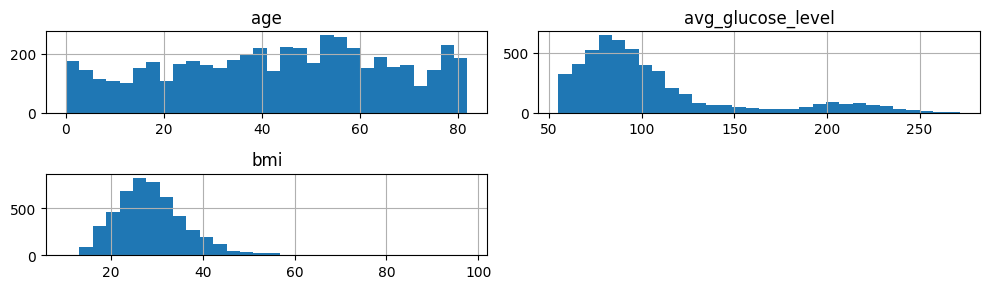

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape:", df.shape)
display(df.head())

print("\n--- Info ---")
df.info()

print("\n--- Missing values ---")
display(df.isna().sum().sort_values(ascending=False))

print("\n--- Distribuição do target (stroke) ---")
display(df['stroke'].value_counts(normalize=True).round(4))

# Distribuição de variáveis numéricas
df[['age', 'avg_glucose_level', 'bmi']].hist(bins=30, figsize=(10,3))
plt.tight_layout()
plt.show()


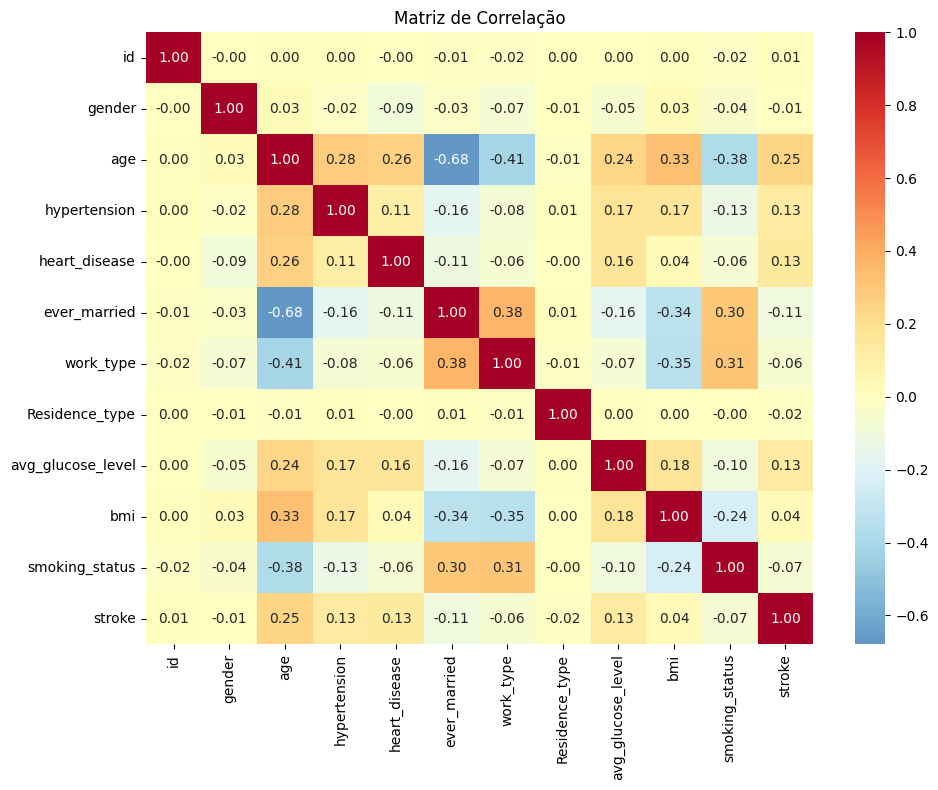


📈 Correlações com Stroke:
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
gender              -0.009200
Residence_type      -0.015458
work_type           -0.058224
smoking_status      -0.066393
ever_married        -0.108340
Name: stroke, dtype: float64


In [6]:
df_corr = df.copy()

for col in df_corr.select_dtypes(include='category').columns:
    df_corr[col] = df_corr[col].cat.codes

# ⬇️ NOVO: Converter object (strings) também
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = pd.factorize(df_corr[col])[0]

# Agora sim, fazer a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='RdYlBu_r', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

print("\n📈 Correlações com Stroke:")
print(df_corr.corr()['stroke'].sort_values(ascending=False))

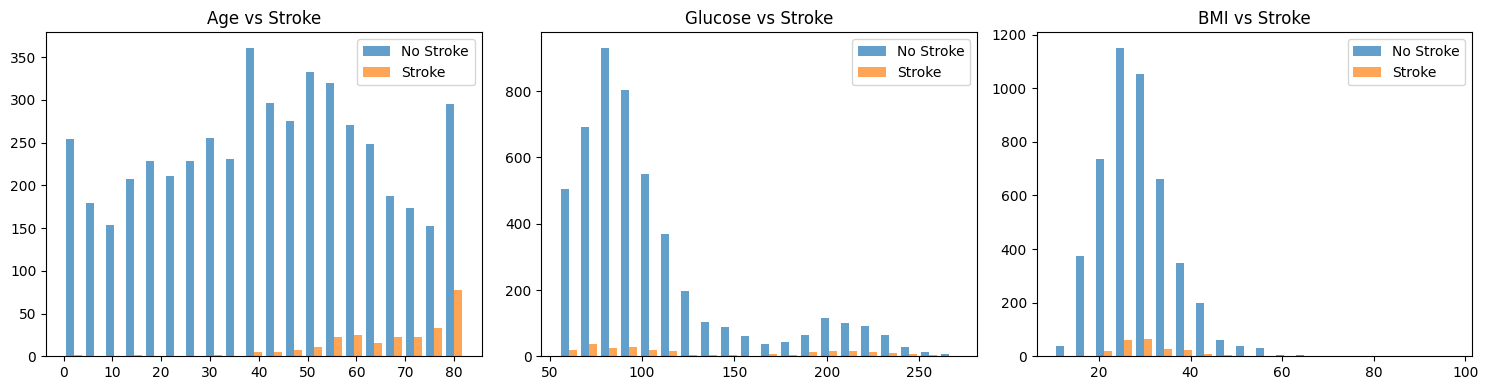

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age vs Stroke
axes[0].hist([df[df['stroke']==0]['age'], df[df['stroke']==1]['age']], 
             bins=20, label=['No Stroke', 'Stroke'], alpha=0.7)
axes[0].set_title('Age vs Stroke')
axes[0].legend()

# Glucose vs Stroke
axes[1].hist([df[df['stroke']==0]['avg_glucose_level'], 
              df[df['stroke']==1]['avg_glucose_level']], 
             bins=20, label=['No Stroke', 'Stroke'], alpha=0.7)
axes[1].set_title('Glucose vs Stroke')
axes[1].legend()

# BMI vs Stroke
axes[2].hist([df[df['stroke']==0]['bmi'].dropna(), 
              df[df['stroke']==1]['bmi'].dropna()], 
             bins=20, label=['No Stroke', 'Stroke'], alpha=0.7)
axes[2].set_title('BMI vs Stroke')
axes[2].legend()

plt.tight_layout()
plt.show()

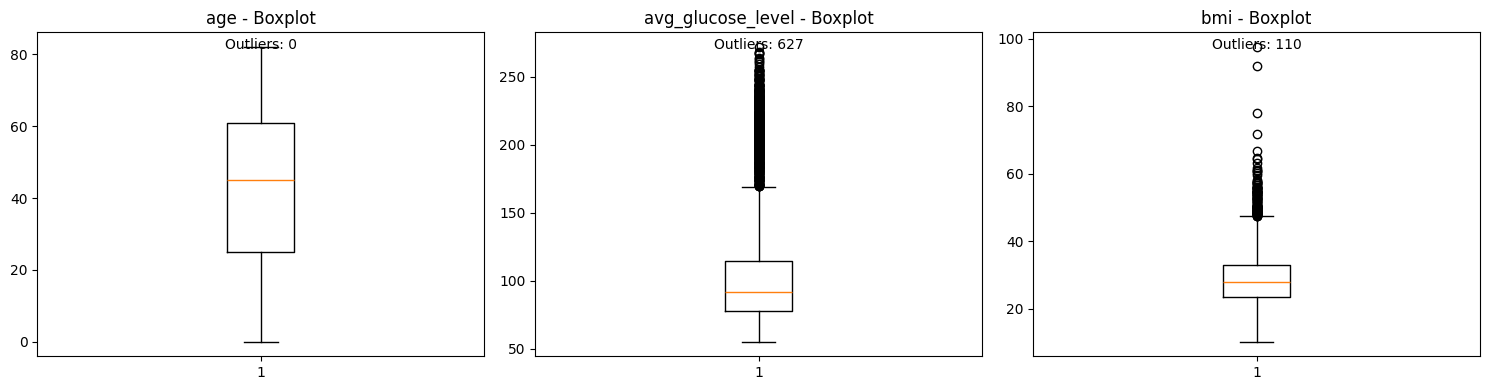


⚠️ DESBALANCEAMENTO DO DATASET:
   Ratio: 19.5:1
   Será necessário considerar SMOTE ou class_weight no M2!


In [8]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'{col} - Boxplot')
    
    # Contar outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = len(df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)])
    axes[idx].text(0.5, 0.95, f'Outliers: {outliers}', 
                   transform=axes[idx].transAxes, ha='center')
plt.tight_layout()
plt.show()

# 4. DESBALANCEAMENTO
print(f"\n⚠️ DESBALANCEAMENTO DO DATASET:")
print(f"   Ratio: {df['stroke'].value_counts()[0]/df['stroke'].value_counts()[1]:.1f}:1")
print(f"   Será necessário considerar SMOTE ou class_weight no M2!")

In [9]:

print("\n🔧 CRIAÇÃO DE NOVAS FEATURES")

# Age groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 35, 50, 65, 120],
                         labels=['child', 'young_adult', 'adult', 'senior', 'elderly'])
print("✅ age_group criada")

# BMI categories
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['underweight', 'normal', 'overweight', 'obese'])
print("✅ bmi_category criada")

# Glucose risk
df['glucose_risk'] = pd.cut(df['avg_glucose_level'],
                            bins=[0, 100, 125, 500],
                            labels=['normal', 'prediabetic', 'diabetic'])
print("✅ glucose_risk criada")

# High risk indicator
df['high_risk'] = ((df['hypertension'] == 1) & (df['heart_disease'] == 1)).astype(int)
print(f"✅ high_risk criada ({df['high_risk'].sum()} pacientes)")

# Interaction feature
df['age_glucose_interaction'] = df['age'] * df['avg_glucose_level']
print("✅ age_glucose_interaction criada")

print(f"\n📊 Total features: {len(df.columns)-1}")


🔧 CRIAÇÃO DE NOVAS FEATURES
✅ age_group criada
✅ bmi_category criada
✅ glucose_risk criada
✅ high_risk criada (64 pacientes)
✅ age_glucose_interaction criada

📊 Total features: 16


In [10]:

if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Trocar 'Unknown' por NaN
df = df.replace('Unknown', pd.NA)

# Converter colunas object em category
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].astype('category')

# Corrigir possíveis outliers absurdos (idade negativa, etc.)
df = df[(df['age'] >= 0) & (df['age'] <= 120)]

# Verificar resultados
print("Missing depois da limpeza:")
display(df.isna().sum())


Missing depois da limpeza:


gender                        0
age                           0
hypertension                  0
heart_disease                 0
ever_married                  0
work_type                     0
Residence_type                0
avg_glucose_level             0
bmi                         201
smoking_status             1544
stroke                        0
age_group                     0
bmi_category                201
glucose_risk                  0
high_risk                     0
age_glucose_interaction       0
dtype: int64

In [ ]:
target = "stroke"

num_features = ["age", "avg_glucose_level", "bmi", "age_glucose_interaction"]

binary_features = ["hypertension", "heart_disease", "high_risk"]

ordinal_features = ["age_group"]

cat_features = ["gender", "ever_married", "work_type", "Residence_type",
                "bmi_category", "glucose_risk", "smoking_status"]

print("📋 Features organizadas:")
print(f"   Numéricas: {num_features}")
print(f"   Binárias: {binary_features}")
print(f"   Categóricas: {cat_features}")
print(f"   Ordinais: {ordinal_features}")


📋 Features organizadas:
   Numéricas: ['age', 'avg_glucose_level', 'bmi', 'age_glucose_interaction']
   Binárias: ['hypertension', 'heart_disease', 'high_risk']
   Categóricas: ['gender', 'ever_married', 'work_type', 'Residence_type', 'age_group', 'bmi_category', 'glucose_risk']
   Ordinais: ['smoking_status']


In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Numérico
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

# Binário
bin_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Categórico nominal
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ➕ ORDINAL (age_group) — ordem explícita
age_categories = [['child', 'young_adult', 'adult', 'senior', 'elderly']]
ord_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(
        categories=age_categories,
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Preprocessor completo
preprocessor = ColumnTransformer([
    ("num", num_pipe, num_features),
    ("bin", bin_pipe, binary_features),
    ("cat", cat_pipe, cat_features),
    ("ord", ord_pipe, ordinal_features)
], remainder='drop')


✅ Pipeline Completo Construído

📊 RESUMO DOS TRANSFORMERS

1️⃣ NUMÉRICOS (4 features):
   Features: ['age', 'avg_glucose_level', 'bmi', 'age_glucose_interaction']
   → Imputer: mediana (robusto a outliers)
   → Scaler: RobustScaler (resistente a outliers)

2️⃣ BINÁRIOS (3 features):
   Features: ['hypertension', 'heart_disease', 'high_risk']
   → Imputer: most_frequent
   → (já são 0/1, sem encoding necessário)

3️⃣ CATEGÓRICOS (7 features):
   Features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'age_group', 'bmi_category', 'glucose_risk']
   → Imputer: most_frequent
   → Encoder: OneHotEncoder

4️⃣ ORDINAIS (1 features):
   Features: ['smoking_status']
   → Imputer: most_frequent
   → Encoder: OrdinalEncoder
   → Ordem: never smoked (0) < formerly smoked (1) < smokes (2)

📦 TOTAL: 15 features processadas


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar pré-processamento
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("Train shape:", X_train_proc.shape)
print("Test shape:", X_test_proc.shape)


Train shape: (4088, 32)
Test shape: (1022, 32)


In [14]:
import joblib, numpy as np, os

os.makedirs("../data/processed", exist_ok=True)

joblib.dump(preprocessor, "../data/processed/preprocessor.joblib")
np.save("../data/processed/X_train.npy", X_train_proc)
np.save("../data/processed/X_test.npy", X_test_proc)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print("✅ Dados processados e guardados em /data/processed/")


✅ Dados processados e guardados em /data/processed/


In [15]:
import numpy as np
import pandas as pd

print("🔍 Verificando ficheiros guardados...\n")

# Carregar ficheiros
X_train_check = np.load("../data/processed/X_train.npy")
X_test_check = np.load("../data/processed/X_test.npy")
y_train_check = pd.read_csv("../data/processed/y_train.csv")
y_test_check = pd.read_csv("../data/processed/y_test.csv")

# Mostrar informação
print(f"✅ X_train: {X_train_check.shape}")
print(f"✅ X_test: {X_test_check.shape}")
print(f"✅ y_train: {len(y_train_check)} rows")
print(f"✅ y_test: {len(y_test_check)} rows")

print("\n📊 Distribuição y_train:")
print(y_train_check['stroke'].value_counts(normalize=True).round(4))

print("\n📊 Distribuição y_test:")
print(y_test_check['stroke'].value_counts(normalize=True).round(4))

🔍 Verificando ficheiros guardados...



✅ X_train: (4088, 32)
✅ X_test: (1022, 32)
✅ y_train: 4088 rows
✅ y_test: 1022 rows

📊 Distribuição y_train:
stroke
0    0.9513
1    0.0487
Name: proportion, dtype: float64

📊 Distribuição y_test:
stroke
0    0.9511
1    0.0489
Name: proportion, dtype: float64
